In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

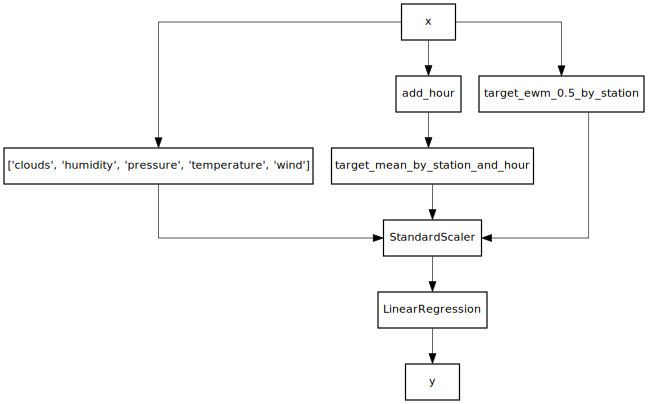

In [2]:
import datetime as dt
from creme import compose
from creme import datasets
from creme import feature_extraction
from creme import linear_model
from creme import metrics
from creme import model_selection
from creme import preprocessing
from creme import stats

X_y = datasets.ToulouseBikes()

def add_hour(x):
    x['hour'] = x['moment'].hour
    return x

model = compose.Whitelister('clouds', 'humidity', 'pressure', 'temperature', 'wind')
model += (
    add_hour |
    feature_extraction.TargetAgg(by=['station', 'hour'], how=stats.Mean())
)
model += feature_extraction.TargetAgg(by='station', how=stats.EWMean(0.5))
model |= preprocessing.StandardScaler()
model |= linear_model.LinearRegression()

model.draw()

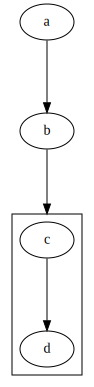

In [27]:
from graphviz import Digraph

p = Digraph(name='parent', graph_attr={'compound': 'true'}, edge_attr={'minlen': '2'})
p.edge('a', 'b')

c = Digraph(name='cluster_child', graph_attr={'compound': 'true'})
c.edge('c', 'd')

p.edge('b', 'c', lhead='cluster_child')

p.subgraph(c)
p

In [14]:
?p.edge

Signature: p.edge(tail_name, head_name, label=None, _attributes=None, **attrs)
Docstring:
Create an edge between two nodes.

Args:
    tail_name: Start node identifier.
    head_name: End node identifier.
    label: Caption to be displayed near the edge.
    attrs: Any additional edge attributes (must be strings).
File:      ~/anaconda3/lib/python3.7/site-packages/graphviz/dot.py
Type:      method
